In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!apt-get update
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,799 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,748 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

In [3]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')# Load saved data
data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e2-communication-simulation-theta.npz", allow_pickle=True)
all_theta = data["all_theta"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e2-communication-simulation-gamma.npz", allow_pickle=True)
all_gamma = data["all_gamma"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e2-communication-simulation-z.npz", allow_pickle=True)
all_z = data["all_z"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e2-communication-simulation-noise.npz", allow_pickle=True)
all_noise = data["all_noise"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e2-communication-simulation-received-signal.npz", allow_pickle=True)
all_received_signal = data["all_received_signal"]

data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/communication-models/e2-communication-simulation-general.npz", allow_pickle=True)
snr_db_array = data["snr_db_array"]
pilot_length_array = data["pilot_length_array"]
M = data["M"]

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-100-sbl-pilot-length-all-snr-db-12.npz", allow_pickle=True)

#sbl_avg_hit_rate = data["avg_hit_rate_sbl"][1]
#sbl_avg_support_recovery_rate = data["avg_support_recovery_rate_sbl"][1]
#sbl_avg_false_alarm_rate = data["avg_false_alarm_rate_sbl"][1]
#sbl_avg_norm_mse = data["avg_norm_mse_sbl"][1]

# Load data
data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-casbl-anc-alpha-all-beta-0-2-snr-db-12-pilot-length-15.npz", allow_pickle=True)
avg_hit_rate_casbl = data["avg_hit_rate_casbl"]
avg_support_recovery_rate_casbl = data["avg_support_recovery_rate_casbl"]
avg_false_alarm_rate_casbl = data["avg_false_alarm_rate_casbl"]
avg_norm_mse_casbl = data["avg_norm_mse_casbl"]
pilot_length = data["pilot_length"]
snr_db = data["snr_db"]
beta = data["beta"]
alpha_array = data["alpha_array"]

# Define the SNR values for x-axis
alpha_values = alpha_array

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Set global parameters
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 16,  # Font size for axis labels
    'axes.titlesize': 16,  # Font size for plot titles
    'xtick.labelsize': 16,  # Font size for x-axis ticks
    'ytick.labelsize': 16,  # Font size for y-axis ticks
    'legend.fontsize': 16,  # Font size for legends
    'grid.linestyle': '--',  # Grid style
    'grid.alpha': 0.7,  # Grid transparency
})

# Plot Support Recovery Rate
plt.figure(figsize=(6, 5))
plt.plot(alpha_values, avg_support_recovery_rate_casbl, marker='s', linestyle='-', color='b',
         label=r'CA-SBL-ANC $(\beta=0.2)$', markersize=4)
plt.xlim(min(alpha_values), max(alpha_values))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'SRR', labelpad=30)
plt.grid(True)
plt.legend(loc='lower right', frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Alpha_Optimization_SRR.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

# Plot Normalized MSE
plt.figure(figsize=(6, 5))
plt.plot(alpha_values, avg_norm_mse_casbl, marker='d', linestyle='-', color='b',
         label=r'CA-SBL-ANC $(\beta=0.2)$', markersize=4)
plt.xlim(min(alpha_values), max(alpha_values))
plt.xlabel(r'$\alpha$')
plt.ylabel(r'NMSE')
plt.yscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend(loc='upper right', frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Alpha_Optimization_NMSE.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-casbl-anc-alpha-all-beta-0-2-snr-db-12-pilot-length-15.npz'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-100-sbl-pilot-length-all-snr-db-12.npz", allow_pickle=True)

#sbl_avg_hit_rate = data["avg_hit_rate_sbl"][1]
#sbl_avg_support_recovery_rate = data["avg_support_recovery_rate_sbl"][1]
#sbl_avg_false_alarm_rate = data["avg_false_alarm_rate_sbl"][1]
#sbl_avg_norm_mse = data["avg_norm_mse_sbl"][1]

# Load data
data = np.load("/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-casbl-anc-alpha-1-5-beta-all-snr-db-12-pilot-length-15.npz", allow_pickle=True)
avg_hit_rate_casbl = data["avg_hit_rate_casbl"]
avg_support_recovery_rate_casbl = data["avg_support_recovery_rate_casbl"]
avg_false_alarm_rate_casbl = data["avg_false_alarm_rate_casbl"]
avg_norm_mse_casbl = data["avg_norm_mse_casbl"]
pilot_length = data["pilot_length"]
snr_db = data["snr_db"]
beta_array = data["beta_array"]
alpha = data["alpha"]

# Define the SNR values for x-axis
beta_values = beta_array

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Set global parameters
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 16,  # Font size for axis labels
    'axes.titlesize': 16,  # Font size for plot titles (if used)
    'xtick.labelsize': 16,  # Font size for x-axis tick labels
    'ytick.labelsize': 16,  # Font size for y-axis tick labels
    'legend.fontsize': 16,  # Font size for legend
    'grid.linestyle': '--',  # Dashed grid style
    'grid.alpha': 0.7,  # Grid transparency
})

# Plot Support Recovery Rate
plt.figure(figsize=(6, 5))
plt.plot(beta_values, avg_support_recovery_rate_casbl, marker='s', linestyle='-', color='b',
         label=r'CA-SBL-ANC $(\alpha=1.5)$', markersize=4)
plt.xlim(min(beta_values), max(beta_values))
plt.xlabel(r'$\beta$')
plt.ylabel(r'SRR', labelpad=30)
plt.grid(True)
plt.legend(loc='lower right', frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Beta_Optimization_SRR.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

# Plot Normalized MSE
plt.figure(figsize=(6, 5))
plt.plot(beta_values, avg_norm_mse_casbl, marker='d', linestyle='-', color='b',
         label=r'CA-SBL-ANC $(\alpha=1.5)$', markersize=4)
plt.xlim(min(beta_values), max(beta_values))
plt.xlabel(r'$\beta$')
plt.ylabel(r'NMSE')
plt.yscale('log')  # Log scale for better visualization
plt.grid(True)
plt.legend(loc='upper right', frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Beta_Optimization_NMSE.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()


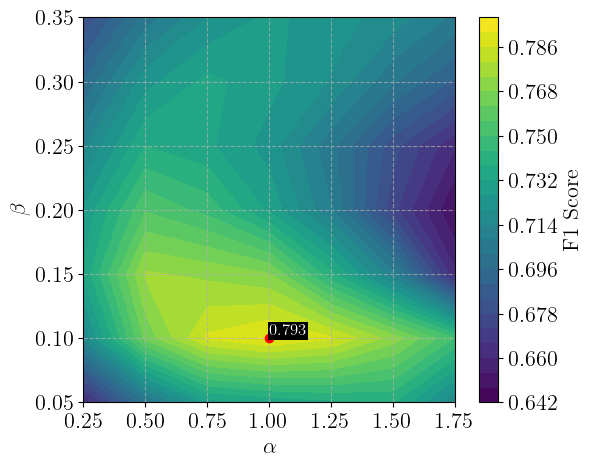

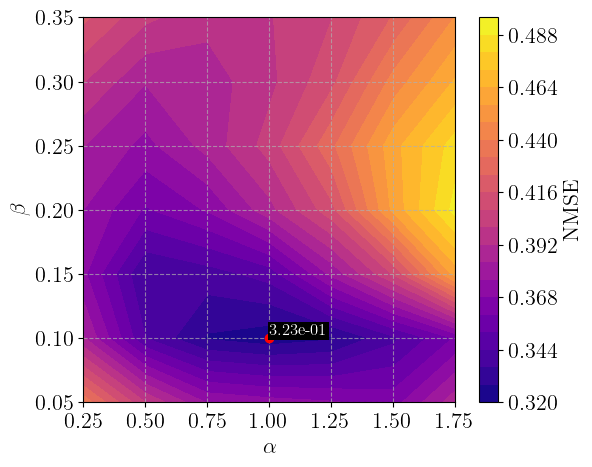

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# File paths (each file corresponds to a specific beta value while alpha varies)
file_paths = [
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-00-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-05-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-10-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-15-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-20-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-25-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-30-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-35-snr-db-12-pilot-length-25.npz",
    "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-100-casbl-anc-alpha-all-beta-0-40-snr-db-12-pilot-length-25.npz",
]

# Initialize lists
beta_values = []
alpha_values = None
f1_values = []
nmse_values = []

# Load data from all files
for file_path in file_paths:
    data = np.load(file_path, allow_pickle=True)
    beta = data["beta"]
    alpha_array = data["alpha_array"]
    avg_f1 = data["avg_f1"]
    avg_nmse = data["avg_nmse"]

    beta_values.append(beta)
    if alpha_values is None:
        alpha_values = alpha_array  # Set alpha values once (assumed same for all)

    f1_values.append(avg_f1)
    nmse_values.append(avg_nmse)

# Convert lists to numpy arrays
beta_values = np.array(beta_values)
alpha_values = np.array(alpha_values)
f1_values = np.array(f1_values)
nmse_values = np.array(nmse_values)

# Create meshgrid
ALPHA, BETA = np.meshgrid(alpha_values, beta_values)

# Trim first and last row/col
ALPHA_trimmed = ALPHA[:, 1:-1][1:-1, :]
BETA_trimmed = BETA[:, 1:-1][1:-1, :]
f1_values_trimmed = f1_values[1:-1, 1:-1]
nmse_values_trimmed = nmse_values[1:-1, 1:-1]
alpha_values_trimmed = alpha_values[1:-1]
beta_values_trimmed = beta_values[1:-1]

# Set plot parameters
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Plot F1 Score Contour
plt.figure(figsize=(6, 5))
contour_f1 = plt.contourf(ALPHA_trimmed, BETA_trimmed, f1_values_trimmed, levels=25, cmap='viridis')
plt.colorbar(contour_f1, label='F1 Score')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.xticks(alpha_values_trimmed)
plt.yticks(beta_values_trimmed)
plt.grid(True)

# Highlight best F1 if inside trimmed area
max_f1 = np.max(f1_values)
max_f1_index = np.unravel_index(np.argmax(f1_values), f1_values.shape)
if 0 < max_f1_index[0] < len(beta_values) - 1 and 0 < max_f1_index[1] < len(alpha_values) - 1:
    max_f1_alpha = alpha_values[max_f1_index[1]]
    max_f1_beta = beta_values[max_f1_index[0]]
    plt.plot(max_f1_alpha, max_f1_beta, 'ro')
    plt.text(max_f1_alpha, max_f1_beta, f'{max_f1:.3f}', color='white',
             fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='black', edgecolor='none', pad=1))

plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Alpha_Beta_F1_Contour.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

# Plot NMSE Contour
plt.figure(figsize=(6, 5))
contour_nmse = plt.contourf(ALPHA_trimmed, BETA_trimmed, nmse_values_trimmed, levels=25, cmap='plasma')
plt.colorbar(contour_nmse, label='NMSE')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.xticks(alpha_values_trimmed)
plt.yticks(beta_values_trimmed)
plt.grid(True)

# Highlight best NMSE if inside trimmed area
min_nmse = np.min(nmse_values)
min_nmse_index = np.unravel_index(np.argmin(nmse_values), nmse_values.shape)
if 0 < min_nmse_index[0] < len(beta_values) - 1 and 0 < min_nmse_index[1] < len(alpha_values) - 1:
    min_nmse_alpha = alpha_values[min_nmse_index[1]]
    min_nmse_beta = beta_values[min_nmse_index[0]]
    plt.plot(min_nmse_alpha, min_nmse_beta, 'ro')
    plt.text(min_nmse_alpha, min_nmse_beta, f'{min_nmse:.2e}', color='white',
             fontsize=12, ha='left', va='bottom', bbox=dict(facecolor='black', edgecolor='none', pad=1))

plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Alpha_Beta_NMSE_Contour.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

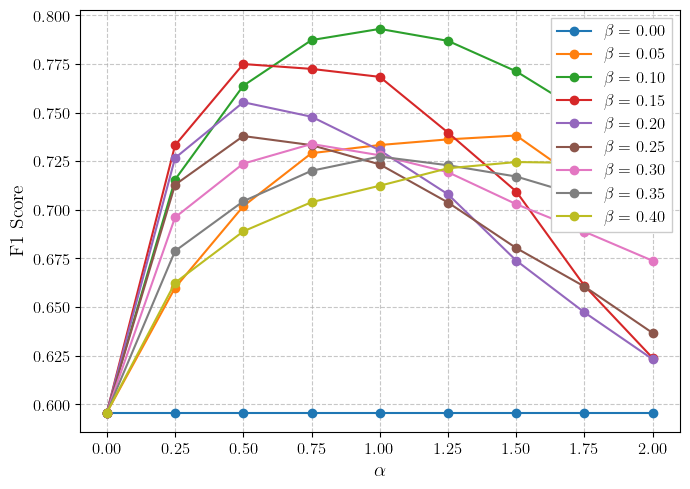

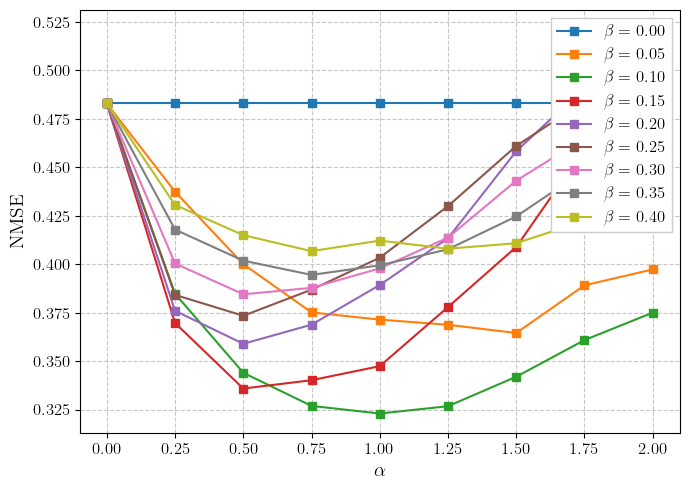

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set global plot parameters
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Alpha vs F1 Score
plt.figure(figsize=(7, 5))
for i, beta in enumerate(beta_values):
    plt.plot(alpha_values, f1_values[i], marker='o', label=fr'$\beta={beta:.2f}$')

plt.xlabel(r'$\alpha$')
plt.ylabel('F1 Score')
plt.grid(True)
plt.legend(fontsize=12, loc='upper right', frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Alpha_vs_F1_Score_All_Beta.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

# Alpha vs NMSE
plt.figure(figsize=(7, 5))
for i, beta in enumerate(beta_values):
    plt.plot(alpha_values, nmse_values[i], marker='s', label=fr'$\beta={beta:.2f}$')

plt.xlabel(r'$\alpha$')
plt.ylabel('NMSE')
plt.grid(True)
plt.legend(fontsize=12, loc='upper right', frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/Alpha_vs_NMSE_All_Beta.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()


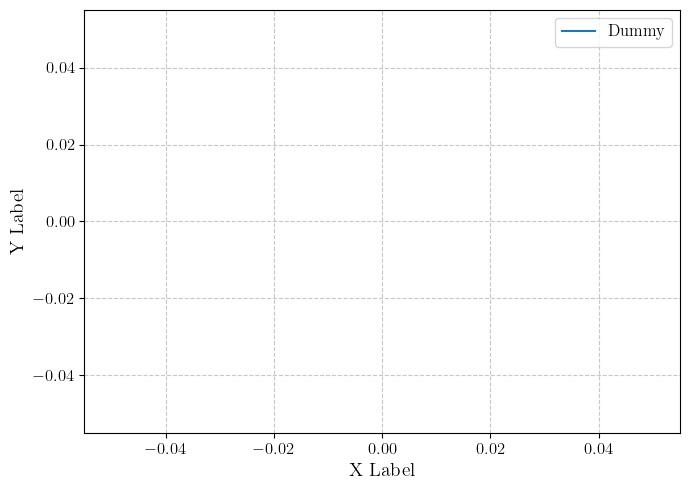

In [4]:
import matplotlib.pyplot as plt

# Set LaTeX-style plot appearance
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Dummy plot
plt.figure(figsize=(7, 5))
plt.plot([], [], label='Dummy')
plt.xlabel(r'X Label')
plt.ylabel(r'Y Label')
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/dummy.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

Results CA-SBL

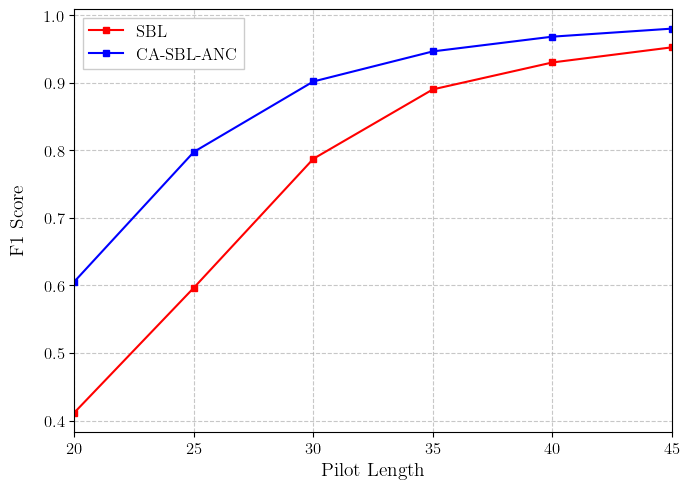

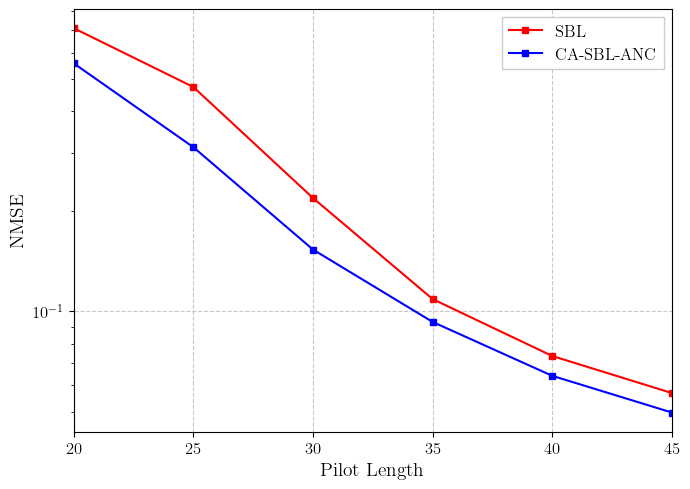

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
file_paths = {
    r'SBL': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-sbl-snr-db-12-pilot-length-all.npz",
    r'CA-SBL-ANC': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-casbl-anc-alpha-1-00-beta-0-10-snr-db-12-pilot-length-all.npz",
    }

colors = ['r', 'b']
keys = ['avg_f1', 'avg_nmse']

datasets = {}
for label, path in file_paths.items():
    data = np.load(path, allow_pickle=True)
    datasets[label] = {key: data[key] for key in keys}

# Define pilot length values
pilot_length_values = pilot_length_array

# Update plot settings
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Plot F1 Score vs Pilot Length
plt.figure(figsize=(7, 5))
for i, (label, color) in enumerate(zip(file_paths.keys(), colors)):
    metric = datasets[label]['avg_f1']
    plt.plot(pilot_length_values, metric, marker='s', linestyle='-', color=color, label=label, markersize=4)
plt.xlim(min(pilot_length_values), max(pilot_length_values))
plt.xticks(pilot_length_values)
plt.xlabel('Pilot Length')
plt.ylabel('F1 Score', labelpad=12)
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/F1_Score_vs_Pilot_Length.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

# Plot NMSE vs Pilot Length
plt.figure(figsize=(7, 5))
for i, (label, color) in enumerate(zip(file_paths.keys(), colors)):
    metric = datasets[label]['avg_nmse']
    plt.plot(pilot_length_values, metric, marker='s', linestyle='-', color=color, label=label, markersize=4)
plt.xlim(min(pilot_length_values), max(pilot_length_values))
plt.xticks(pilot_length_values)
plt.xlabel('Pilot Length')
plt.ylabel('NMSE')
plt.yscale('log')
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/NMSE_vs_Pilot_Length.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

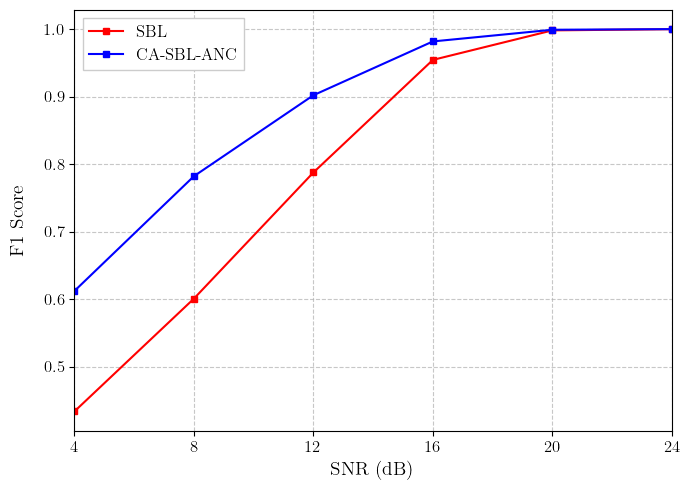

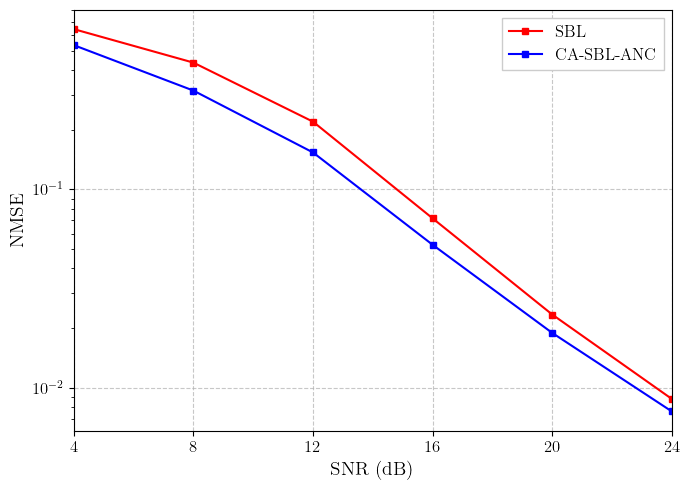

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
file_paths = {
    r'SBL': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-sbl-snr-db-all-pilot-length-30.npz",
    r'CA-SBL-ANC': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-casbl-anc-alpha-1-00-beta-0-10-snr-db-all-pilot-length-30.npz",
   }

colors = ['r', 'b']
keys = ['avg_f1', 'avg_nmse']

datasets = {}
for label, path in file_paths.items():
    data = np.load(path, allow_pickle=True)
    datasets[label] = {key: data[key] for key in keys}

# Define pilot length values
snr_db_values = snr_db_array

# Update plot settings
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# Plot F1 Score vs SNR
plt.figure(figsize=(7, 5))
for i, (label, color) in enumerate(zip(file_paths.keys(), colors)):
    metric = datasets[label]['avg_f1']
    plt.plot(snr_db_values, metric, marker='s', linestyle='-', color=color, label=label, markersize=4)
plt.xlim(min(snr_db_values), max(snr_db_values))
plt.xticks(snr_db_values)
plt.xlabel('SNR (dB)')
plt.ylabel('F1 Score', labelpad=12)
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/F1_Score_vs_SNR_DB.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

# Plot NMSE vs SNR
plt.figure(figsize=(7, 5))
for i, (label, color) in enumerate(zip(file_paths.keys(), colors)):
    metric = datasets[label]['avg_nmse']
    plt.plot(snr_db_values, metric, marker='s', linestyle='-', color=color, label=label, markersize=4)
plt.xlim(min(snr_db_values), max(snr_db_values))
plt.xticks(snr_db_values)
plt.xlabel('SNR (dB)')
plt.ylabel('NMSE')
plt.yscale('log')
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Github/mtc-device-activation/figures/NMSE_vs_SNR_DB.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
def load_data(file_path, keys):
    """Loads data from an NPZ file and returns a dictionary with required keys."""
    data = np.load(file_path, allow_pickle=True)
    return {key: data[key] for key in keys}

def plot_metric(pilot_length_values, metrics, labels, title, y_label, markers, colors, linestyles, log_scale=False, marker_size=4):
    """Plots a given metric for multiple datasets."""
    plt.figure(figsize=(6, 5))
    for i, (metric, label) in enumerate(zip(metrics, labels)):
        zorder = 2 if label == "SBL" or label == "CA-SBL-BANC (α=1, β=0.2)" else 1
        plt.plot(pilot_length_values, metric, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=label, zorder=zorder, markersize=marker_size)
    plt.xlim(min(pilot_length_values), max(pilot_length_values))
    plt.xticks(pilot_length_values)
    plt.xlabel('Pilot Length', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend(fontsize=12, frameon=True, framealpha=1, facecolor='white', fancybox=False)
    plt.tight_layout()
    plt.show()

# Define file paths and relevant keys
file_paths = {
    "SBL": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-sbl-snr-db-12-pilot-length-all.npz",
    }

markers = ['o', 'd', 's', '^', 'h', 'p', 'v', '+', '*']
colors = ['k', 'b', 'r', 'g', 'm', 'c', 'y', 'purple', 'teal']
linestyles = ['-', '--', '--', '--', '--', '--', '--', '--', '--']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl', 'avg_hit_rate_sbl', 'avg_false_alarm_rate_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl', 'avg_hit_rate_casbl', 'avg_false_alarm_rate_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    datasets[label] = load_data(path, keys)

# Define pilot length values
pilot_length_values = pilot_length_array

# Plot different metrics
plot_metric(pilot_length_values,
            [datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'SRR vs Pilot Length', 'SRR', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'NMSE vs Pilot Length', 'NMSE', markers, colors, linestyles, log_scale=True)

plot_metric(pilot_length_values,
            [datasets[label]['avg_hit_rate_casbl' if "CA-SBL" in label else 'avg_hit_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'Hit Rate vs Pilot Length', 'Hit Rate (%)', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_false_alarm_rate_casbl' if "CA-SBL" in label else 'avg_false_alarm_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'False Alarm Rate vs Pilot Length', 'False Alarm Rate (%)', markers, colors, linestyles)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-1000-sbl-snr-db-12-pilot-length-all.npz'

In [ ]:
def load_data(file_path, keys):
    """Loads data from an NPZ file and returns a dictionary with required keys."""
    data = np.load(file_path, allow_pickle=True)
    return {key: data[key] for key in keys}

def plot_metric(snr_values, metrics, labels, title, y_label, markers, colors, linestyles, log_scale=False, marker_size=4):
    """Plots a given metric for multiple datasets."""
    plt.rcParams['font.family'] = 'serif'
    plt.figure(figsize=(6, 5))
    for i, (metric, label) in enumerate(zip(metrics, labels)):
        zorder = 2 if label == "SBL" or label == "CA-SBL-BANC (α=1, β=0.2)" else 1
        plt.plot(snr_values, metric, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=label, zorder=zorder, markersize=marker_size)
    plt.xlim(min(snr_values), max(snr_values))
    plt.xticks(snr_values)
    plt.xlabel('SNR (dB)', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend(fontsize=12, frameon=True, framealpha=1, facecolor='white', fancybox=False)
    plt.tight_layout()
    plt.show()

# Define file paths and relevant keys
file_paths = {
    "SBL": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=0.1, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-0-1-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=0.5, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-0-5-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=1, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-1-0-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=2, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-2-0-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=2.5, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-2-5-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=3, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-3-0-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=5, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-5-0-beta-0-2-snr-db-all-pilot-length-20.npz",
    "CA-SBL-BANC (α=10, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-10-0-beta-0-2-snr-db-all-pilot-length-20.npz"
}

markers = ['o', 'd', 's', '^', 'h', 'p', 'v', '+', '*']
colors = ['k', 'b', 'r', 'g', 'm', 'c', 'y', 'purple', 'teal']
linestyles = ['-', '--', '--', '--', '--', '--', '--', '--', '--']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl', 'avg_hit_rate_sbl', 'avg_false_alarm_rate_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl', 'avg_hit_rate_casbl', 'avg_false_alarm_rate_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    datasets[label] = load_data(path, keys)

# Define SNR values
snr_values = snr_db_array

# Plot different metrics
plot_metric(snr_values,
            [datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'SRR vs SNR', 'SRR', markers, colors, linestyles)

plot_metric(snr_values,
            [datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'NMSE vs SNR', 'NMSE', markers, colors, linestyles, log_scale=True)

plot_metric(snr_values,
            [datasets[label]['avg_hit_rate_casbl' if "CA-SBL" in label else 'avg_hit_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'Hit Rate vs SNR', 'Hit Rate (%)', markers, colors, linestyles)

plot_metric(snr_values,
            [datasets[label]['avg_false_alarm_rate_casbl' if "CA-SBL" in label else 'avg_false_alarm_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'False Alarm Rate vs SNR', 'False Alarm Rate (%)', markers, colors, linestyles)


In [ ]:
def load_data(file_path, keys):
    """Loads data from an NPZ file and returns a dictionary with required keys."""
    data = np.load(file_path, allow_pickle=True)
    return {key: data[key] for key in keys}

def plot_metric(pilot_length_values, metrics, labels, title, y_label, markers, colors, linestyles, log_scale=False, marker_size=4):
    """Plots a given metric for multiple datasets."""
    plt.figure(figsize=(6, 5))
    for i, (metric, label) in enumerate(zip(metrics, labels)):
        zorder = 2 if label == "SBL" or label == "CA-SBL-BANC (α=1, β=0.2)" else 1
        plt.plot(pilot_length_values, metric, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=label, zorder=zorder, markersize=marker_size)
    plt.xlim(min(pilot_length_values), max(pilot_length_values))
    plt.xticks(pilot_length_values)
    plt.xlabel('Pilot Length', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend(fontsize=12, frameon=True, framealpha=1, facecolor='white', fancybox=False)
    plt.tight_layout()
    plt.show()

# Define file paths and relevant keys
file_paths = {
    "SBL": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=0.1, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-0-1-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=0.5, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-0-5-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=1, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-1-0-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=2, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-2-0-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=2.5, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-2-5-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=3, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-3-0-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=5, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-5-0-beta-0-2-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=10, β=0.2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-banc-alpha-10-0-beta-0-2-pilot-length-all-snr-db-12.npz"
}

markers = ['o', 'd', 's', '^', 'h', 'p', 'v', '+', '*']
colors = ['k', 'b', 'r', 'g', 'm', 'c', 'y', 'purple', 'teal']
linestyles = ['-', '--', '--', '--', '--', '--', '--', '--', '--']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl', 'avg_hit_rate_sbl', 'avg_false_alarm_rate_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl', 'avg_hit_rate_casbl', 'avg_false_alarm_rate_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    datasets[label] = load_data(path, keys)

# Define pilot length values
pilot_length_values = pilot_length_array

# Plot different metrics
plot_metric(pilot_length_values,
            [datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'SRR vs Pilot Length', 'SRR', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'NMSE vs Pilot Length', 'NMSE', markers, colors, linestyles, log_scale=True)

plot_metric(pilot_length_values,
            [datasets[label]['avg_hit_rate_casbl' if "CA-SBL" in label else 'avg_hit_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'Hit Rate vs Pilot Length', 'Hit Rate (%)', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_false_alarm_rate_casbl' if "CA-SBL" in label else 'avg_false_alarm_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'False Alarm Rate vs Pilot Length', 'False Alarm Rate (%)', markers, colors, linestyles)


In [ ]:
def load_data(file_path, keys):
    """Loads data from an NPZ file and returns a dictionary with required keys."""
    data = np.load(file_path, allow_pickle=True)
    return {key: data[key] for key in keys}

def plot_metric(snr_values, metrics, labels, title, y_label, markers, colors, linestyles, log_scale=False, marker_size=4):
    """Plots a given metric for multiple datasets."""
    plt.rcParams['font.family'] = 'serif'
    plt.figure(figsize=(6, 5))
    for i, (metric, label) in enumerate(zip(metrics, labels)):
        zorder = 2 if label == "SBL" or label == "CA-SBL-BANC (α=1, β=0.2)" else 1
        plt.plot(snr_values, metric, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=label, zorder=zorder, markersize=marker_size)
    plt.xlim(min(snr_values), max(snr_values))
    plt.xticks(snr_values)
    plt.xlabel('SNR (dB)', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend(fontsize=12, frameon=True, framealpha=1, facecolor='white', fancybox=False)
    plt.tight_layout()
    plt.show()

# Define file paths and relevant keys
file_paths = {
    "SBL": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-snr-db-all-pilot-length-20.npz",
    "CA-SBL-IC (α=0.1)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-0-1-snr-db-all-pilot-length-20.npz",
    "CA-SBL-IC (α=1)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-1-0-snr-db-all-pilot-length-20.npz",
    "CA-SBL-IC (α=2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-2-0-snr-db-all-pilot-length-20.npz",
    "CA-SBL-IC (α=-0.5)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-N0-5-snr-db-all-pilot-length-20.npz"
}

markers = ['o', 'd', 's', '^', 'h', 'p', 'v', '+', '*']
colors = ['k', 'b', 'r', 'g', 'm', 'c', 'y', 'purple', 'teal']
linestyles = ['-', '--', '--', '--', '--', '--', '--', '--', '--']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl', 'avg_hit_rate_sbl', 'avg_false_alarm_rate_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl', 'avg_hit_rate_casbl', 'avg_false_alarm_rate_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    datasets[label] = load_data(path, keys)

# Define SNR values
snr_values = snr_db_array

# Plot different metrics
plot_metric(snr_values,
            [datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'SRR vs SNR', 'SRR', markers, colors, linestyles)

plot_metric(snr_values,
            [datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'NMSE vs SNR', 'NMSE', markers, colors, linestyles, log_scale=True)

plot_metric(snr_values,
            [datasets[label]['avg_hit_rate_casbl' if "CA-SBL" in label else 'avg_hit_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'Hit Rate vs SNR', 'Hit Rate (%)', markers, colors, linestyles)

plot_metric(snr_values,
            [datasets[label]['avg_false_alarm_rate_casbl' if "CA-SBL" in label else 'avg_false_alarm_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'False Alarm Rate vs SNR', 'False Alarm Rate (%)', markers, colors, linestyles)


In [ ]:
def load_data(file_path, keys):
    """Loads data from an NPZ file and returns a dictionary with required keys."""
    data = np.load(file_path, allow_pickle=True)
    return {key: data[key] for key in keys}

def plot_metric(pilot_length_values, metrics, labels, title, y_label, markers, colors, linestyles, log_scale=False, marker_size=4):
    """Plots a given metric for multiple datasets."""
    plt.figure(figsize=(6, 5))
    for i, (metric, label) in enumerate(zip(metrics, labels)):
        zorder = 2 if label == "SBL" or label == "CA-SBL-BANC (α=1, β=0.2)" else 1
        plt.plot(pilot_length_values, metric, marker=markers[i], linestyle=linestyles[i], color=colors[i], label=label, zorder=zorder, markersize=marker_size)
    plt.xlim(min(pilot_length_values), max(pilot_length_values))
    plt.xticks(pilot_length_values)
    plt.xlabel('Pilot Length', fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)
    if log_scale:
        plt.yscale('log')
    plt.grid(True)
    plt.legend(fontsize=12, frameon=True, framealpha=1, facecolor='white', fancybox=False)
    plt.tight_layout()
    plt.show()

# Define file paths and relevant keys
file_paths = {
    "SBL": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-sbl-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=0.1)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-0-1-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=1)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-1-0-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=2)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-2-0-pilot-length-all-snr-db-12.npz",
    "CA-SBL-BANC (α=-0.5)": "/content/drive/My Drive/Github/mtc-device-activation/data/results/e1-results-10-casbl-ic-alpha-N0-5-pilot-length-all-snr-db-12.npz"
}

markers = ['o', 'd', 's', '^', 'h', 'p', 'v', '+', '*']
colors = ['k', 'b', 'r', 'g', 'm', 'c', 'y', 'purple', 'teal']
linestyles = ['-', '--', '--', '--', '--', '--', '--', '--', '--']

data_keys_sbl = ['gamma_sbl', 'avg_support_recovery_rate_sbl', 'avg_norm_mse_sbl', 'avg_hit_rate_sbl', 'avg_false_alarm_rate_sbl']
data_keys_casbl = ['gamma_casbl', 'avg_support_recovery_rate_casbl', 'avg_norm_mse_casbl', 'avg_hit_rate_casbl', 'avg_false_alarm_rate_casbl']

datasets = {}
for label, path in file_paths.items():
    keys = data_keys_casbl if "CA-SBL" in label else data_keys_sbl
    datasets[label] = load_data(path, keys)

# Define pilot length values
pilot_length_values = pilot_length_array

# Plot different metrics
plot_metric(pilot_length_values,
            [datasets[label]['avg_support_recovery_rate_casbl' if "CA-SBL" in label else 'avg_support_recovery_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'SRR vs Pilot Length', 'SRR', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_norm_mse_casbl' if "CA-SBL" in label else 'avg_norm_mse_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'NMSE vs Pilot Length', 'NMSE', markers, colors, linestyles, log_scale=True)

plot_metric(pilot_length_values,
            [datasets[label]['avg_hit_rate_casbl' if "CA-SBL" in label else 'avg_hit_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'Hit Rate vs Pilot Length', 'Hit Rate (%)', markers, colors, linestyles)

plot_metric(pilot_length_values,
            [datasets[label]['avg_false_alarm_rate_casbl' if "CA-SBL" in label else 'avg_false_alarm_rate_sbl'] for label in file_paths],
            list(file_paths.keys()),
            'False Alarm Rate vs Pilot Length', 'False Alarm Rate (%)', markers, colors, linestyles)
